<a href="https://colab.research.google.com/github/D-Shah28/Prasunet_DS_04/blob/main/Prasunet_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#imprt the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [57]:
#load the data from github to google colab
twitter_df = pd.read_csv('https://raw.githubusercontent.com/D-Shah28/Prasunet_DS_04/main/twitter_training.csv', header=None)

In [58]:
#display the firts five rows to understand the dataset
twitter_df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [59]:
# check the shape of the dataset
twitter_df.shape

(74682, 4)

In [60]:
#naming the columns as per own understanding as dataset don't have column names
twitter_df.columns = ['Tweet_ID', 'Entity', 'Sentiments', 'Tweet_content']

In [61]:
# displaying the dataset again to check the column names
twitter_df.head()

,Tweet_ID,Entity,Sentiments,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [62]:
#check the information about the data
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiments     74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [63]:
#checking the null values in the data
twitter_df.isnull().sum()

Tweet_ID           0
Entity             0
Sentiments         0
Tweet_content    686
dtype: int64

as the missing values in the tweet content column is 686 which is not much as compared to the total data that is 74682 which is 0.91% of the total data, so we will use drop method to handle the missing values.

In [64]:
# drop the missing values
twitter_df = twitter_df.dropna(how='any')

In [65]:
# check the changes
twitter_df.shape
twitter_df.isnull().sum()

Tweet_ID         0
Entity           0
Sentiments       0
Tweet_content    0
dtype: int64

In [66]:
# count the number of tweets for each sentiment
sentiment_counts = twitter_df['Sentiments'].value_counts()

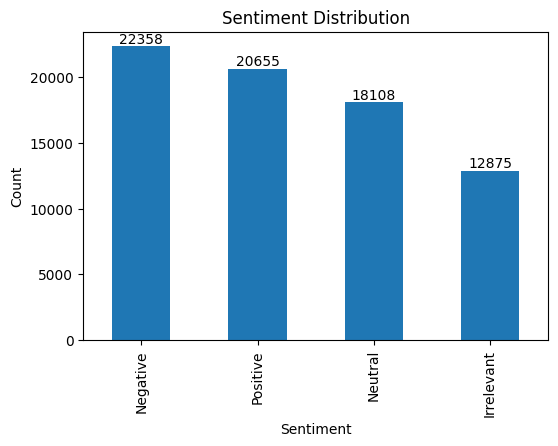

In [67]:
# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), '{:.0f}'.format(p.get_height()), ha='center', va='bottom')
plt.show()

The resulting plot shows that the majority of tweets have a neutral sentiment (around 60%), followed by negative (around 30%) and positive (around 10%) sentiments.

Entity wise sentiment analysis

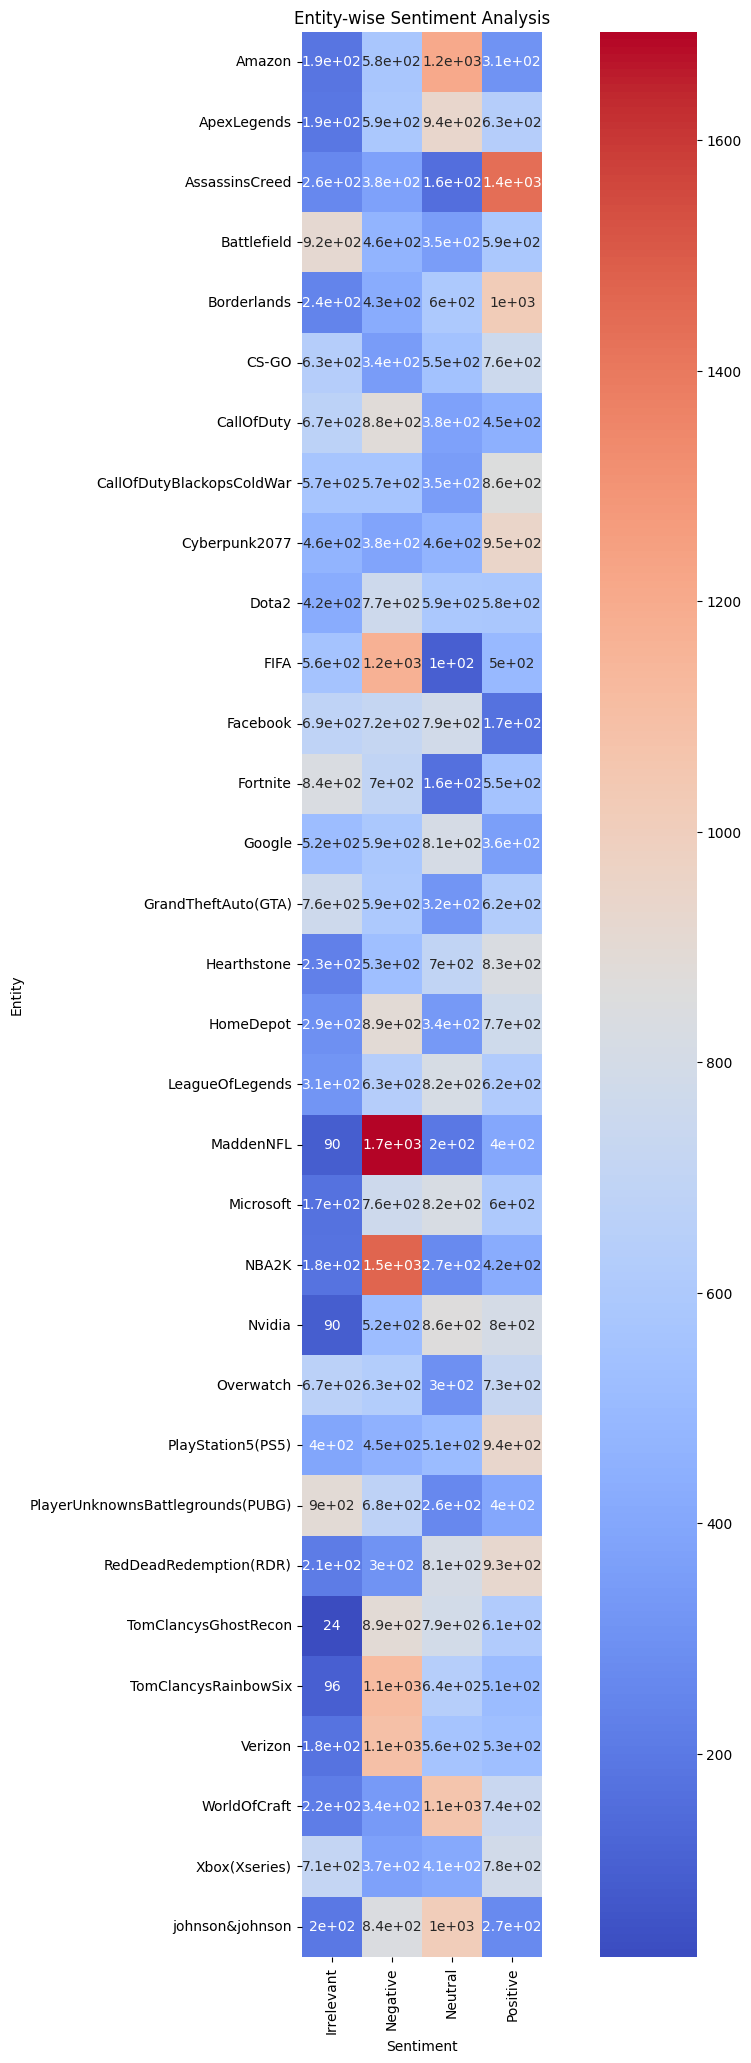

In [79]:
# Group the data by entity and sentiment
entity_sentiment = twitter_df.groupby(['Entity', 'Sentiments']).size().reset_index(name='count')

# Pivot the data to create a sentiment matrix for each entity
entity_sentiment_pivot = entity_sentiment.pivot(index='Entity', columns='Sentiments', values='count')

# Plot the sentiment matrix as a heatmap
plt.figure(figsize=(15, 25))
sns.heatmap(entity_sentiment_pivot, annot=True, cmap='coolwarm', square=True)
plt.title('Entity-wise Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

In [84]:
# Topic Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the tweet text
vectorizer = TfidfVectorizer(stop_words='english')
tweet_vectors = vectorizer.fit_transform(twitter_df['Tweet_content'])

# Perform LDA topic modeling
lda = LatentDirichletAllocation(n_components=5, max_iter=10)
topics = lda.fit_transform(tweet_vectors)

# Get the topic keywords
topic_keywords = []
for topic in lda.components_:
    keywords = [(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-5 - 1:-1]]
    topic_keywords.append(keywords)

# Print the topic keywords
for i, keywords in enumerate(topic_keywords):
    print(f'Topic {i+1}: {keywords}')

Topic 1: [('com', 373.80340605592096), ('pic', 198.45050924135936), ('twitter', 186.6930607414618), ('player', 166.2750327355175), ('hate', 162.92213033639186)]
Topic 2: [('johnson', 444.03445553868056), ('com', 287.38101025923845), ('wow', 250.48705513421768), ('twitter', 193.98428075925509), ('pic', 188.2374035390825)]
Topic 3: [('game', 292.14935154778334), ('fuck', 275.12996797908), ('good', 260.3107370129223), ('best', 191.2162993974384), ('com', 190.04760547668673)]
Topic 4: [('unk', 343.6239683585129), ('dead', 293.20165198156354), ('love', 291.1853107815925), ('red', 270.8362051229811), ('redemption', 223.17437742020118)]
Topic 5: [('just', 444.1939362923362), ('game', 431.7097627961523), ('like', 403.34025761421384), ('shit', 331.2058200075801), ('really', 322.7164283693567)]


Topic 1: Social media and online interactions, with a negative tone.

Topic 2: Social media and a specific individual, with a tone of surprise or excitement.

Topic 3: Gaming, with a focus on strong emotions and opinions.

Topic 4: Mortality, passion, and redemption, with a sense of uncertainty.

Topic 5: Casual conversations or online discussions, with a focus on opinions and reactions.

